In [1]:
from gower.gower_dist import *

Simple example from D'Orazio

In [2]:
ex = pd.DataFrame({"Sex1": ["M", "M", "F", "F", "F", "M", "M", "F", "F", "F"],
                   "Sex2": ["M", "M", "F", "F", "F", "F", "F", "M", "M", "M"],
                   "Age1": [15] * 10,
                   "Age2": [15, 36, 58, 78, 100, 15, 36, 58, 78, 100]})
distances = np.diag(gower_matrix(ex[["Sex1", "Age1"]].to_numpy(), ex[["Sex2", "Age2"]].to_numpy(), weight_cat="uniform"))
print(distances)
ex.loc[np.argsort(distances)]

  0%|          | 0/1 [00:00<?, ?it/s]

[1.] [1.99923369]


  0%|          | 0/10 [00:00<?, ?it/s]

[0.         0.16468484 0.33721182 0.49405452 0.6665815  0.3334185
 0.49810334 0.67063032 0.82747302 1.        ]


,Sex1,Sex2,Age1,Age2
0,M,M,15,15
1,M,M,15,36
5,M,F,15,15
2,F,F,15,58
3,F,F,15,78
6,M,F,15,36
4,F,F,15,100
7,F,M,15,58
8,F,M,15,78
9,F,M,15,100


Laptops dataset

In [3]:
laptops = pd.read_csv("laptops/laptops_train.csv", index_col=0)
print(laptops.shape)
print(laptops.apply(lambda col: col.unique(), axis=0).apply(len))
laptops.drop(["Operating System Version", "Model Name"], axis=1, inplace=True)
laptops.RAM = np.log2(laptops.RAM.str[:-2].astype(float))  # all in GB
laptops.Weight = laptops.Weight.str[:-2].astype(float)  # all in kg
laptops["Screen Size"] = laptops["Screen Size"].str[:-1].astype(float)  # all in inches

(977, 12)
Model Name                  488
Category                      6
Screen Size                  18
Screen                       38
CPU                         106
RAM                           8
 Storage                     36
GPU                          98
Operating System              7
Operating System Version      5
Weight                      166
Price                       639
dtype: int64


  0%|          | 0/4 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1.] [3.58239555 2.57960695 9.76533587 9.78901859]


  0%|          | 0/977 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

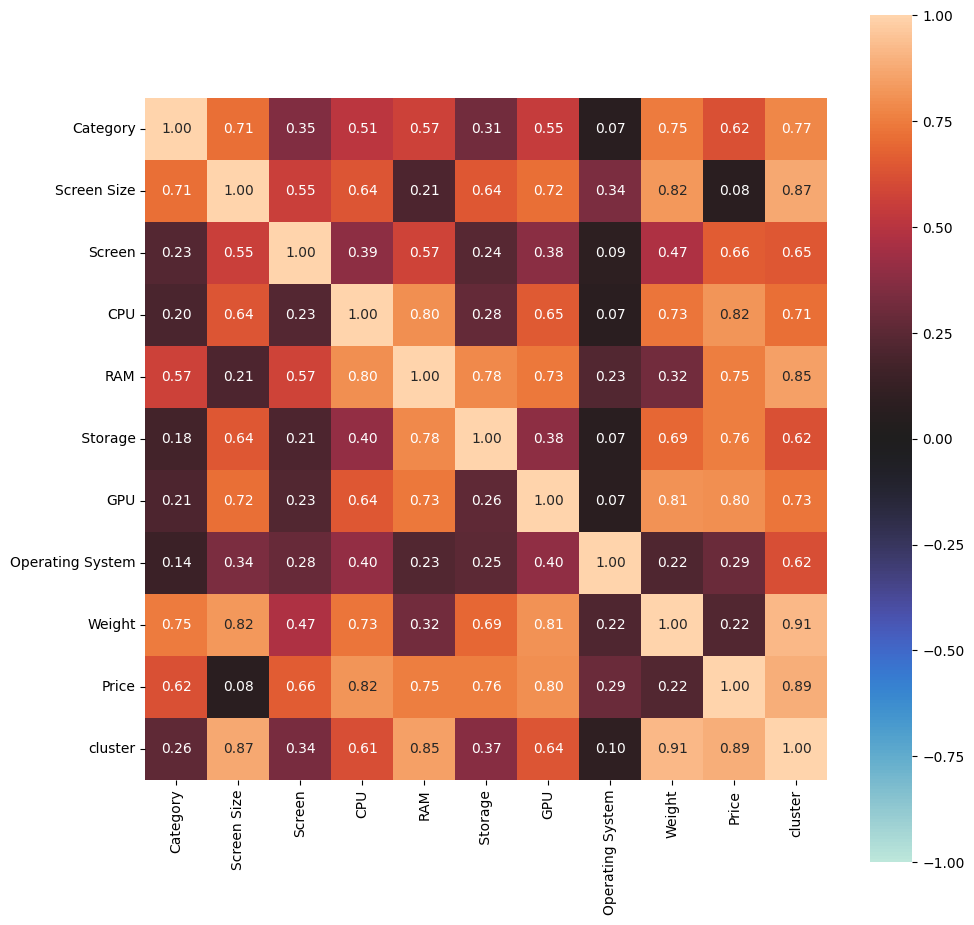

{'eps': 0.06, 'min_samples': 1} 0.5659969712741242 0.7027215028941414
{1: 279, 2: 50, 3: 5, 4: 6, 5: 4, 6: 3, 7: 1, 9: 1, 10: 1, 12: 2, 80: 1, 391: 1}


,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Weight,Price,cluster
Manufacturer,,,,,,,,,,,
HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,3.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,5112900.00,2
Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,2.0,500GB HDD,AMD Radeon R5,Windows,2.10,3556800.00,2
Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,3.0,256GB SSD,Intel UHD Graphics 620,Windows,1.60,6846840.00,2
HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,2.0,500GB HDD,Intel HD Graphics 620,No OS,1.86,3502558.80,2
HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,2.0,500GB HDD,Intel HD Graphics 520,No OS,1.86,3067651.08,2
...,...,...,...,...,...,...,...,...,...,...,...
Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,3.0,256GB SSD + 500GB HDD,Nvidia GeForce GTX 950M,Windows,2.69,7922772.00,94
HP,Notebook,15.6,1366x768,AMD E-Series 9000e 1.5GHz,2.0,500GB HDD,AMD Radeon R2,Windows,2.10,2934360.00,95
Asus,Notebook,15.6,Full HD 1920x1080,AMD A10-Series A10-9620P 2.5GHz,2.0,128GB SSD + 1TB HDD,AMD Radeon R5 M430,Windows,2.20,5112900.00,97


In [4]:
laptops = optimize_clusters(laptops)

laptops


pokemon dataset

In [5]:
pokemon = pd.read_csv("pokemon/pokemon_alopez247.csv").iloc[:, 2:]
for c in pokemon.columns[pokemon.dtypes != object]:
    pokemon.loc[pokemon[c].isna(), c] = np.nanmedian(pokemon[c])
for c in pokemon.columns[pokemon.dtypes == object]:
    pokemon.loc[pokemon[c].isna(), c] = "none"

  0%|          | 0/12 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1. 1. 1. 1.] [9.83191692 6.23330692 8.7774213  7.40674472 8.56896208 6.08023227
 8.6667598  2.23606798 2.37841423 4.11410905 6.10668807 5.28873157]


  0%|          | 0/721 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

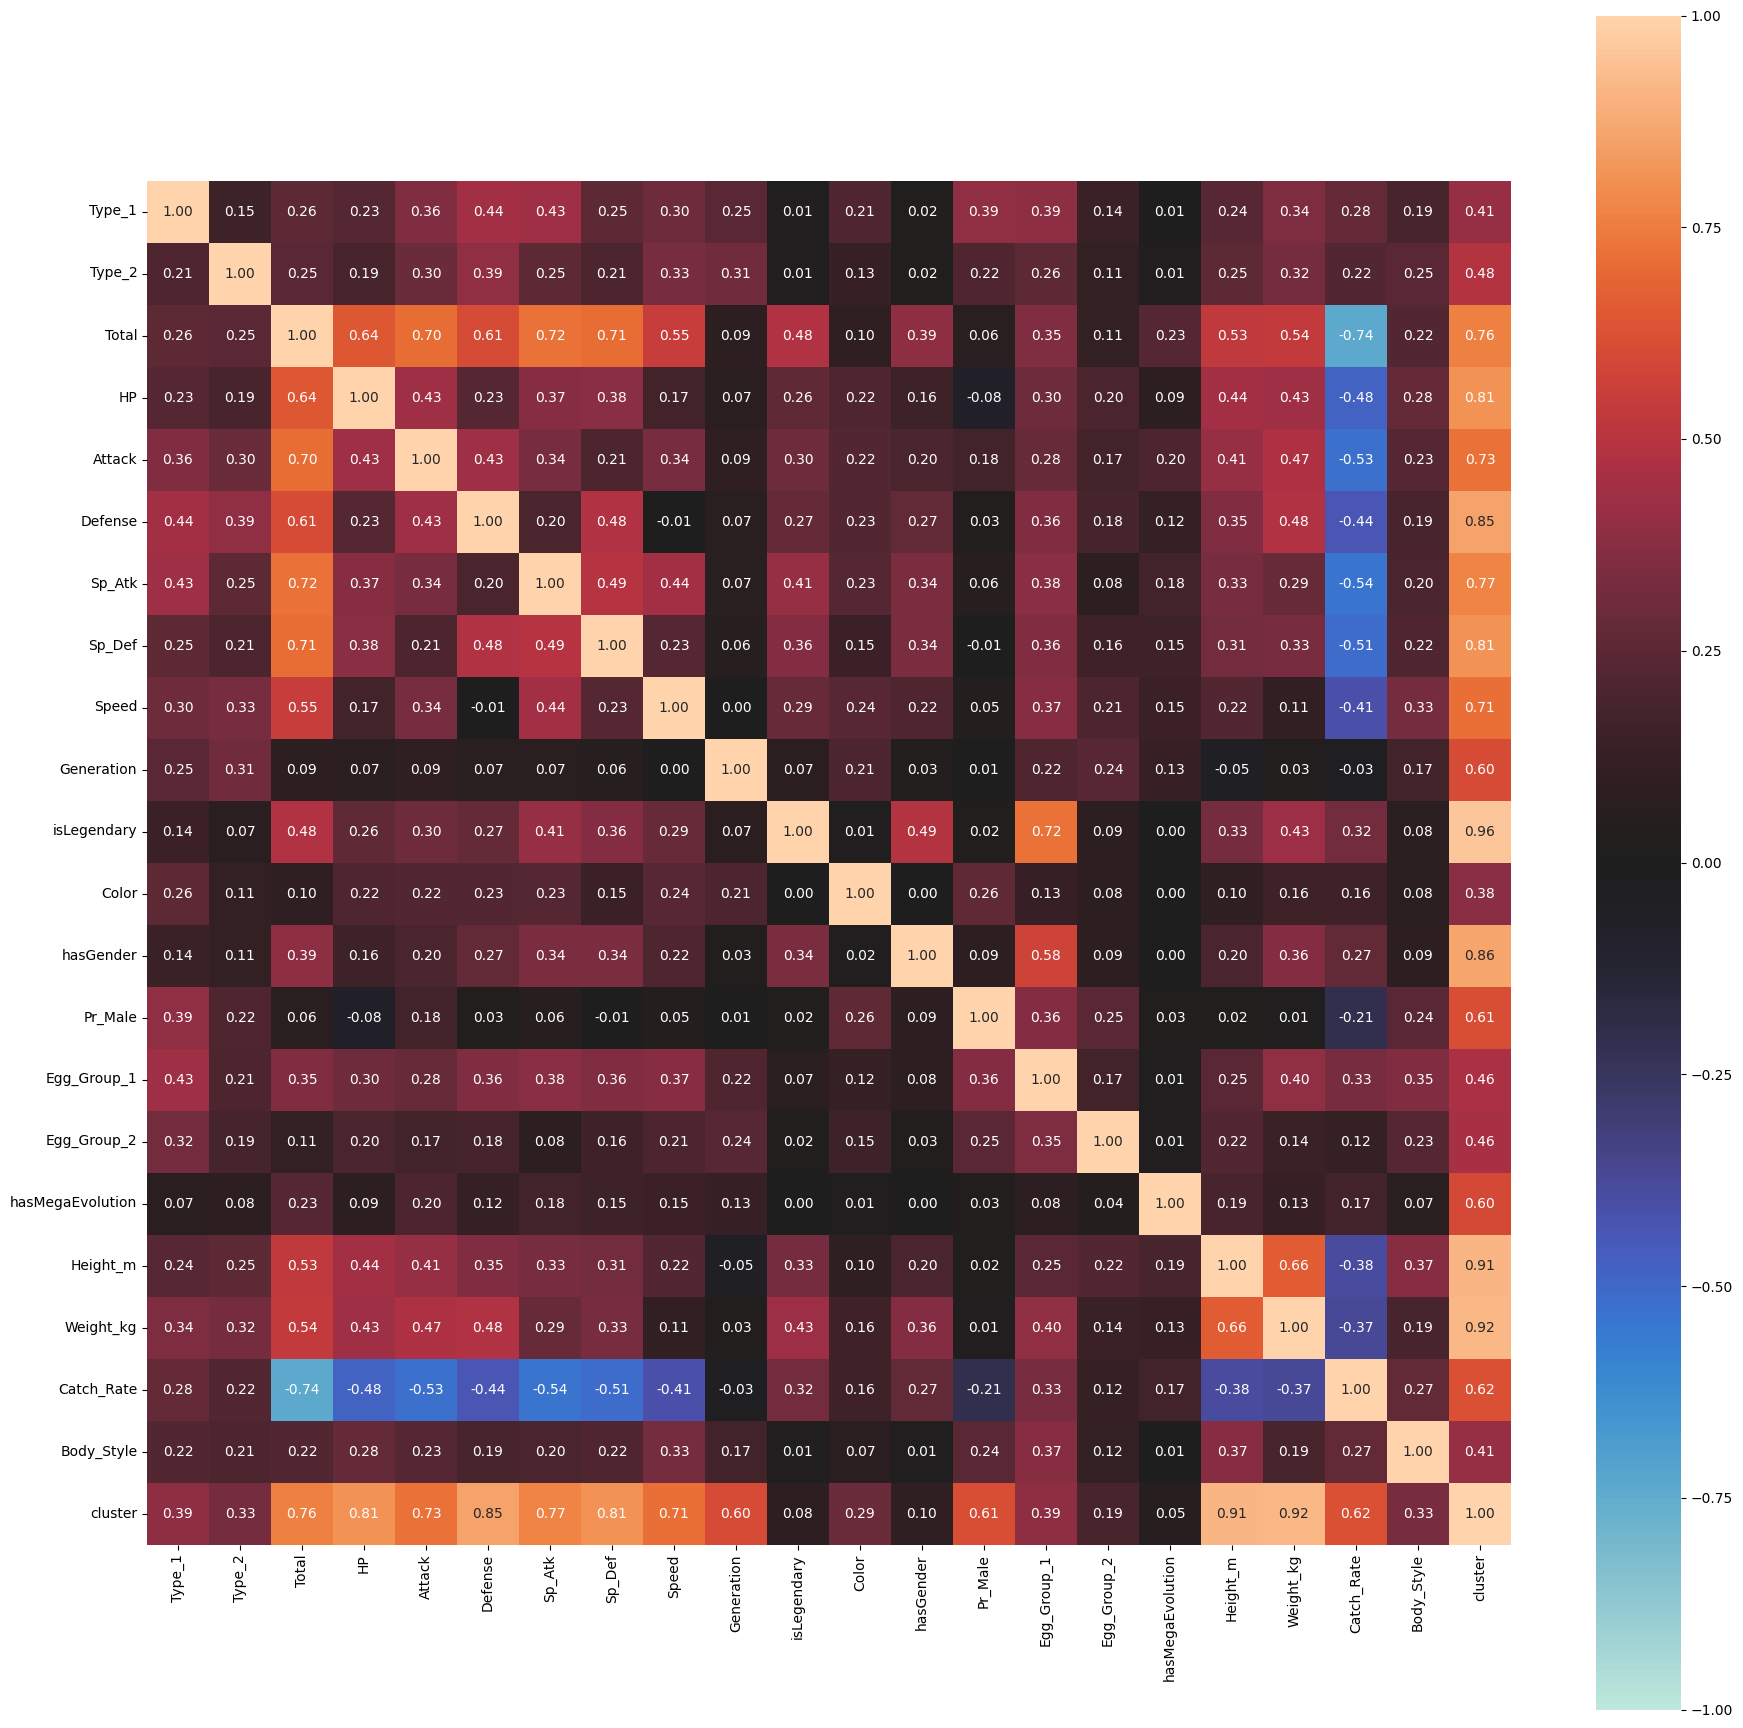

{'eps': 0.09, 'min_samples': 1} 0.4836396513328568 0.6217154601703815
{1: 198, 2: 19, 3: 7, 4: 2, 5: 2, 6: 1, 9: 1, 12: 1, 419: 1}


,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,cluster
0,Grass,Poison,318,45,49,49,65,65,45,1,...,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped,0
1,Grass,Poison,405,60,62,63,80,80,60,1,...,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped,0
3,Fire,none,309,39,52,43,60,50,65,1,...,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed,0
4,Fire,none,405,58,64,58,80,65,80,1,...,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed,0
5,Fire,Flying,534,78,84,78,109,85,100,1,...,True,0.875,Monster,Dragon,True,1.70,90.5,45,bipedal_tailed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,Water,Dark,460,70,120,40,95,40,95,3,...,True,0.500,Water_2,none,True,1.80,88.8,60,with_fins,95
319,Water,none,400,130,70,35,70,35,60,3,...,True,0.500,Field,Water_2,False,2.01,130.0,125,with_fins,96
320,Water,none,500,170,90,45,90,45,60,3,...,True,0.500,Field,Water_2,False,14.50,398.0,60,with_fins,97
322,Fire,Ground,460,70,100,70,105,75,40,3,...,True,0.500,Field,none,True,1.91,220.0,150,quadruped,98


In [6]:
pokemon = optimize_clusters(pokemon)

pokemon


cereal dataset

In [7]:
cereal = pd.read_csv("cereal.csv", index_col="name")

  0%|          | 0/13 [00:00<?, ?it/s]

[1. 1.] [3.11408153 2.23606798 1.94661024 4.68286606 2.9017289  3.97290493
 4.         5.16292731 1.32467556 1.41421356 2.19227642 3.20879561
 5.47379335]


  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

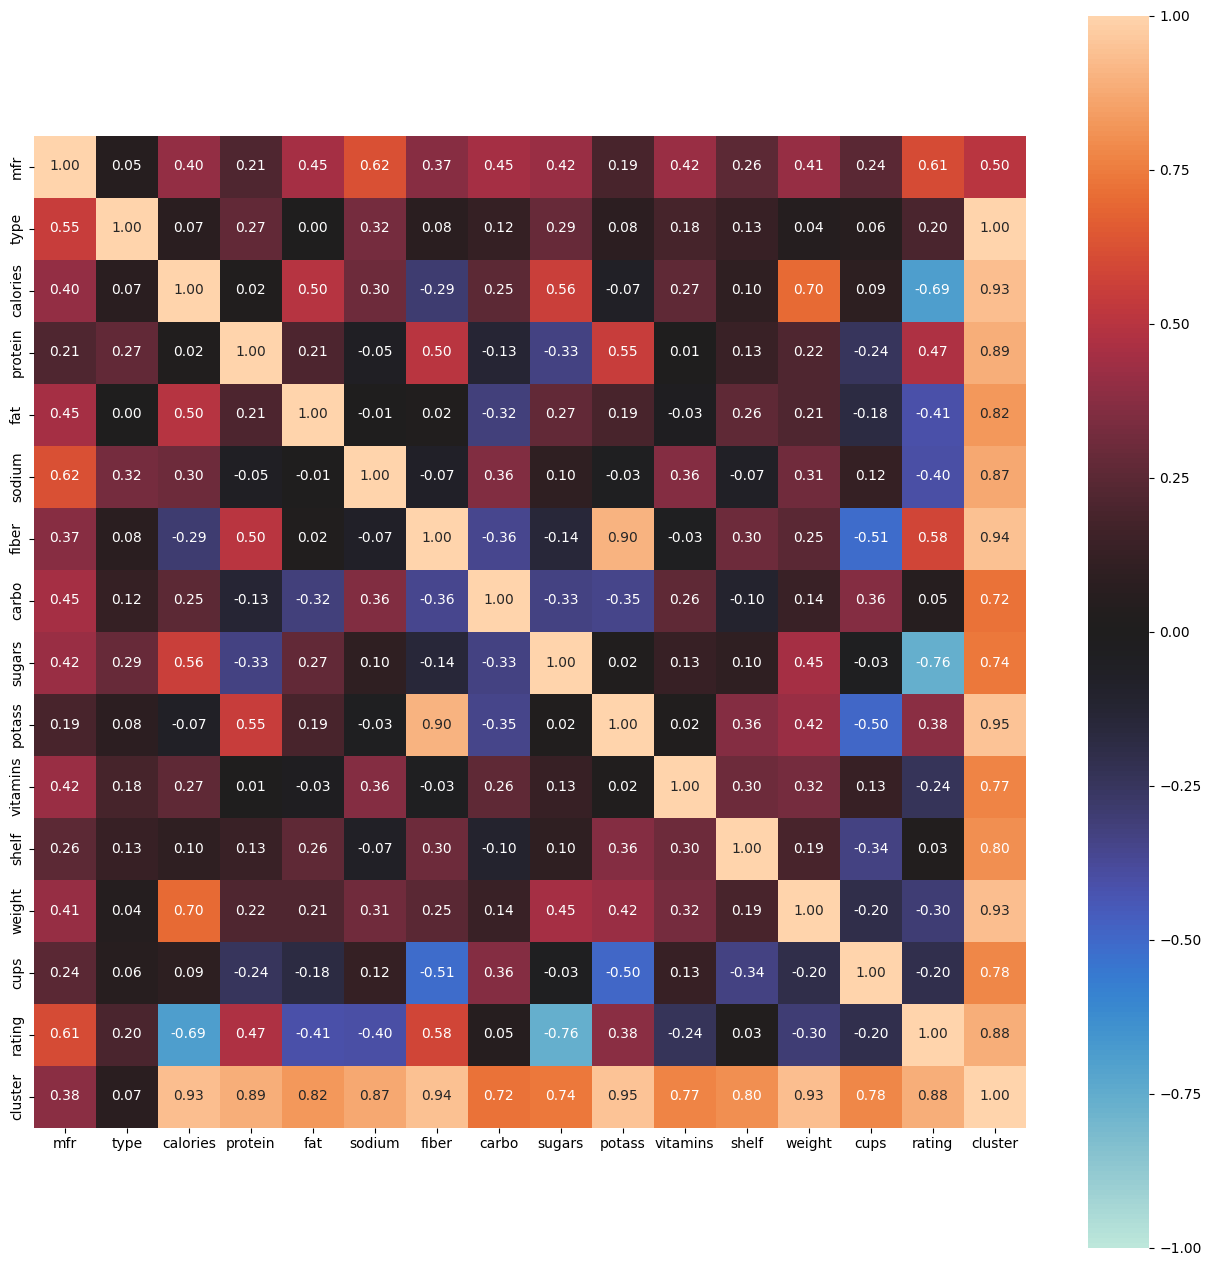

{'eps': 0.09, 'min_samples': 1} 0.6662342507459602 0.8130101416245421
{1: 18, 2: 2, 3: 2, 4: 1, 11: 1, 34: 1}


,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cluster
name,,,,,,,,,,,,,,,,
Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541,5
Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.0,1.00,33.174094,5
Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.0,0.67,49.120253,5
Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851,5
Cinnamon Toast Crunch,G,C,120,1,3,210,0.0,13.0,9,45,25,2,1.0,0.75,19.823573,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,3
Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,4
Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.0,0.67,53.313813,7


In [8]:
cereal = optimize_clusters(cereal)

cereal


fast food dataset

In [9]:
fastfood = pd.read_csv("fastfood.csv", index_col="item")

fastfood.drop(["fiber", "protein", "vit_a", "vit_c", "calcium", "salad"], axis=1, inplace=True)

  0%|          | 0/9 [00:00<?, ?it/s]

[1.] [6.39970864 7.28787297 6.79107961 5.468764   2.37841423 3.62279156
 7.09840555 7.85788398 3.26325245]


  0%|          | 0/515 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

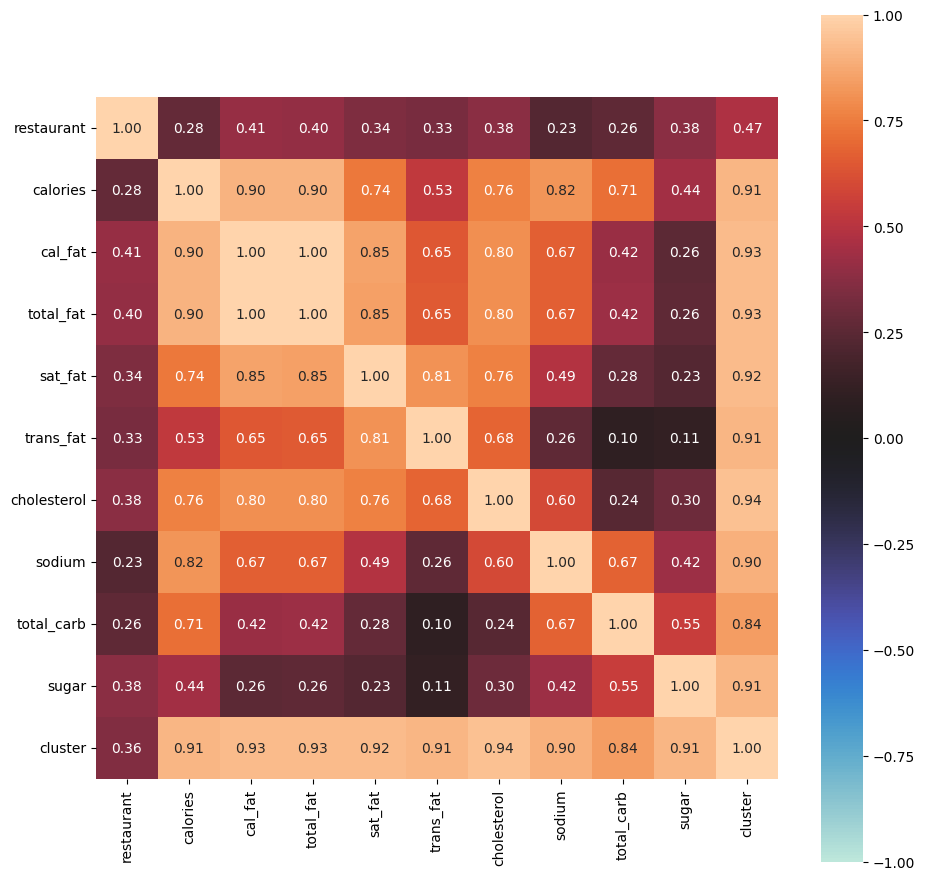

{'eps': 0.03, 'min_samples': 1} 0.5469944897796986 0.8724137476003753
{1: 92, 2: 16, 3: 12, 4: 1, 6: 2, 7: 1, 8: 2, 9: 1, 11: 1, 296: 1}


,restaurant,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,sugar,cluster
item,,,,,,,,,,,
Big Mac,Mcdonalds,540,250,28,10.0,1.0,80,950,46,9,5
Cheeseburger,Mcdonalds,300,100,12,5.0,0.5,40,680,33,7,5
Classic Chicken Sandwich,Mcdonalds,510,210,24,4.0,0.0,65,1040,49,6,5
Double Cheeseburger,Mcdonalds,430,190,21,11.0,1.0,85,1040,35,7,5
Filet-O-Fish®,Mcdonalds,380,170,18,4.0,0.0,40,640,38,5,5
...,...,...,...,...,...,...,...,...,...,...,...
Steak Finger Basket,Dairy Queen,910,430,48,13.0,0.5,45,2210,95,2,94
Chicken Mozzarella Sandwich,Dairy Queen,640,220,25,8.0,0.0,60,1530,68,3,96
Crispy Chicken BLT Salad,Dairy Queen,520,280,31,10.0,0.0,100,1470,25,6,97


In [10]:
fastfood = optimize_clusters(fastfood)

fastfood

diabetes dataset

In [11]:
diabetes = pd.read_csv("diabetes.csv")

  0%|          | 0/9 [00:00<?, ?it/s]

[] [ 3.9583739   8.26834134  5.49843413  4.53379881  8.10886795  7.2901893
 11.33327259  6.49367083  1.        ]


  0%|          | 0/768 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

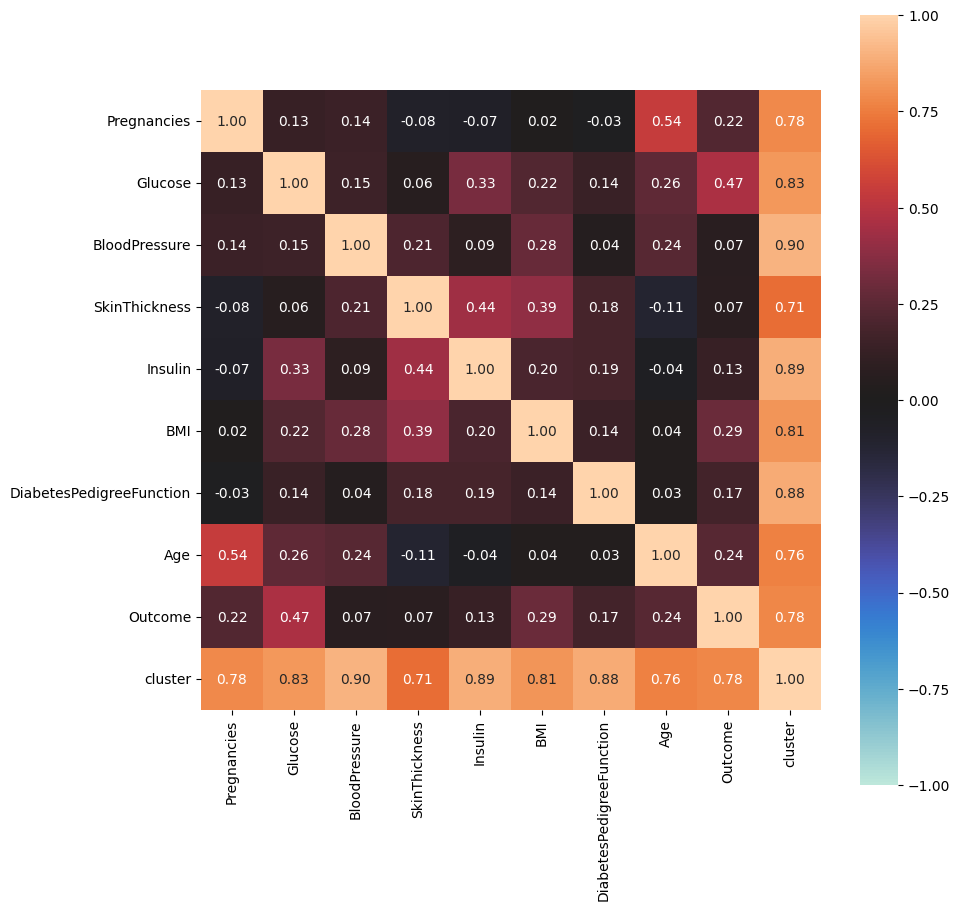

{'eps': 0.05, 'min_samples': 1} 0.4808189206092714 0.8342023907179325
{1: 232, 2: 16, 3: 6, 4: 2, 5: 2, 6: 1, 7: 1, 10: 1, 11: 1, 434: 1}


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
1,1,85,66,29,0,26.6,0.351,31,0,1
3,1,89,66,23,94,28.1,0.167,21,0,1
5,5,116,74,0,0,25.6,0.201,30,0,1
10,4,110,92,0,0,37.6,0.191,30,0,1
17,7,107,74,0,0,29.6,0.254,31,1,1
...,...,...,...,...,...,...,...,...,...,...
218,5,85,74,22,0,29.0,1.224,32,1,95
220,0,177,60,29,478,34.6,1.072,21,1,96
221,2,158,90,0,0,31.6,0.805,66,1,97
223,7,142,60,33,190,28.8,0.687,61,0,98


In [12]:
diabetes = optimize_clusters(diabetes)

diabetes


airbnb dataset

  0%|          | 0/13 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1.] [ 4.24069066  2.          1.          1.          2.59367911  5.69125617
  2.49804953 25.33517415 11.09709691 10.3182022  21.09658055 28.71184374
 63.87464639]


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

/Users/temp/gower/venv/lib/python3.9/site-packages/dython/nominal.py:293: RuntimeWarning: Rounded eta = 1.0000000000000002 to 1. This is probably due to floating point precision issues.
  warnings.warn(


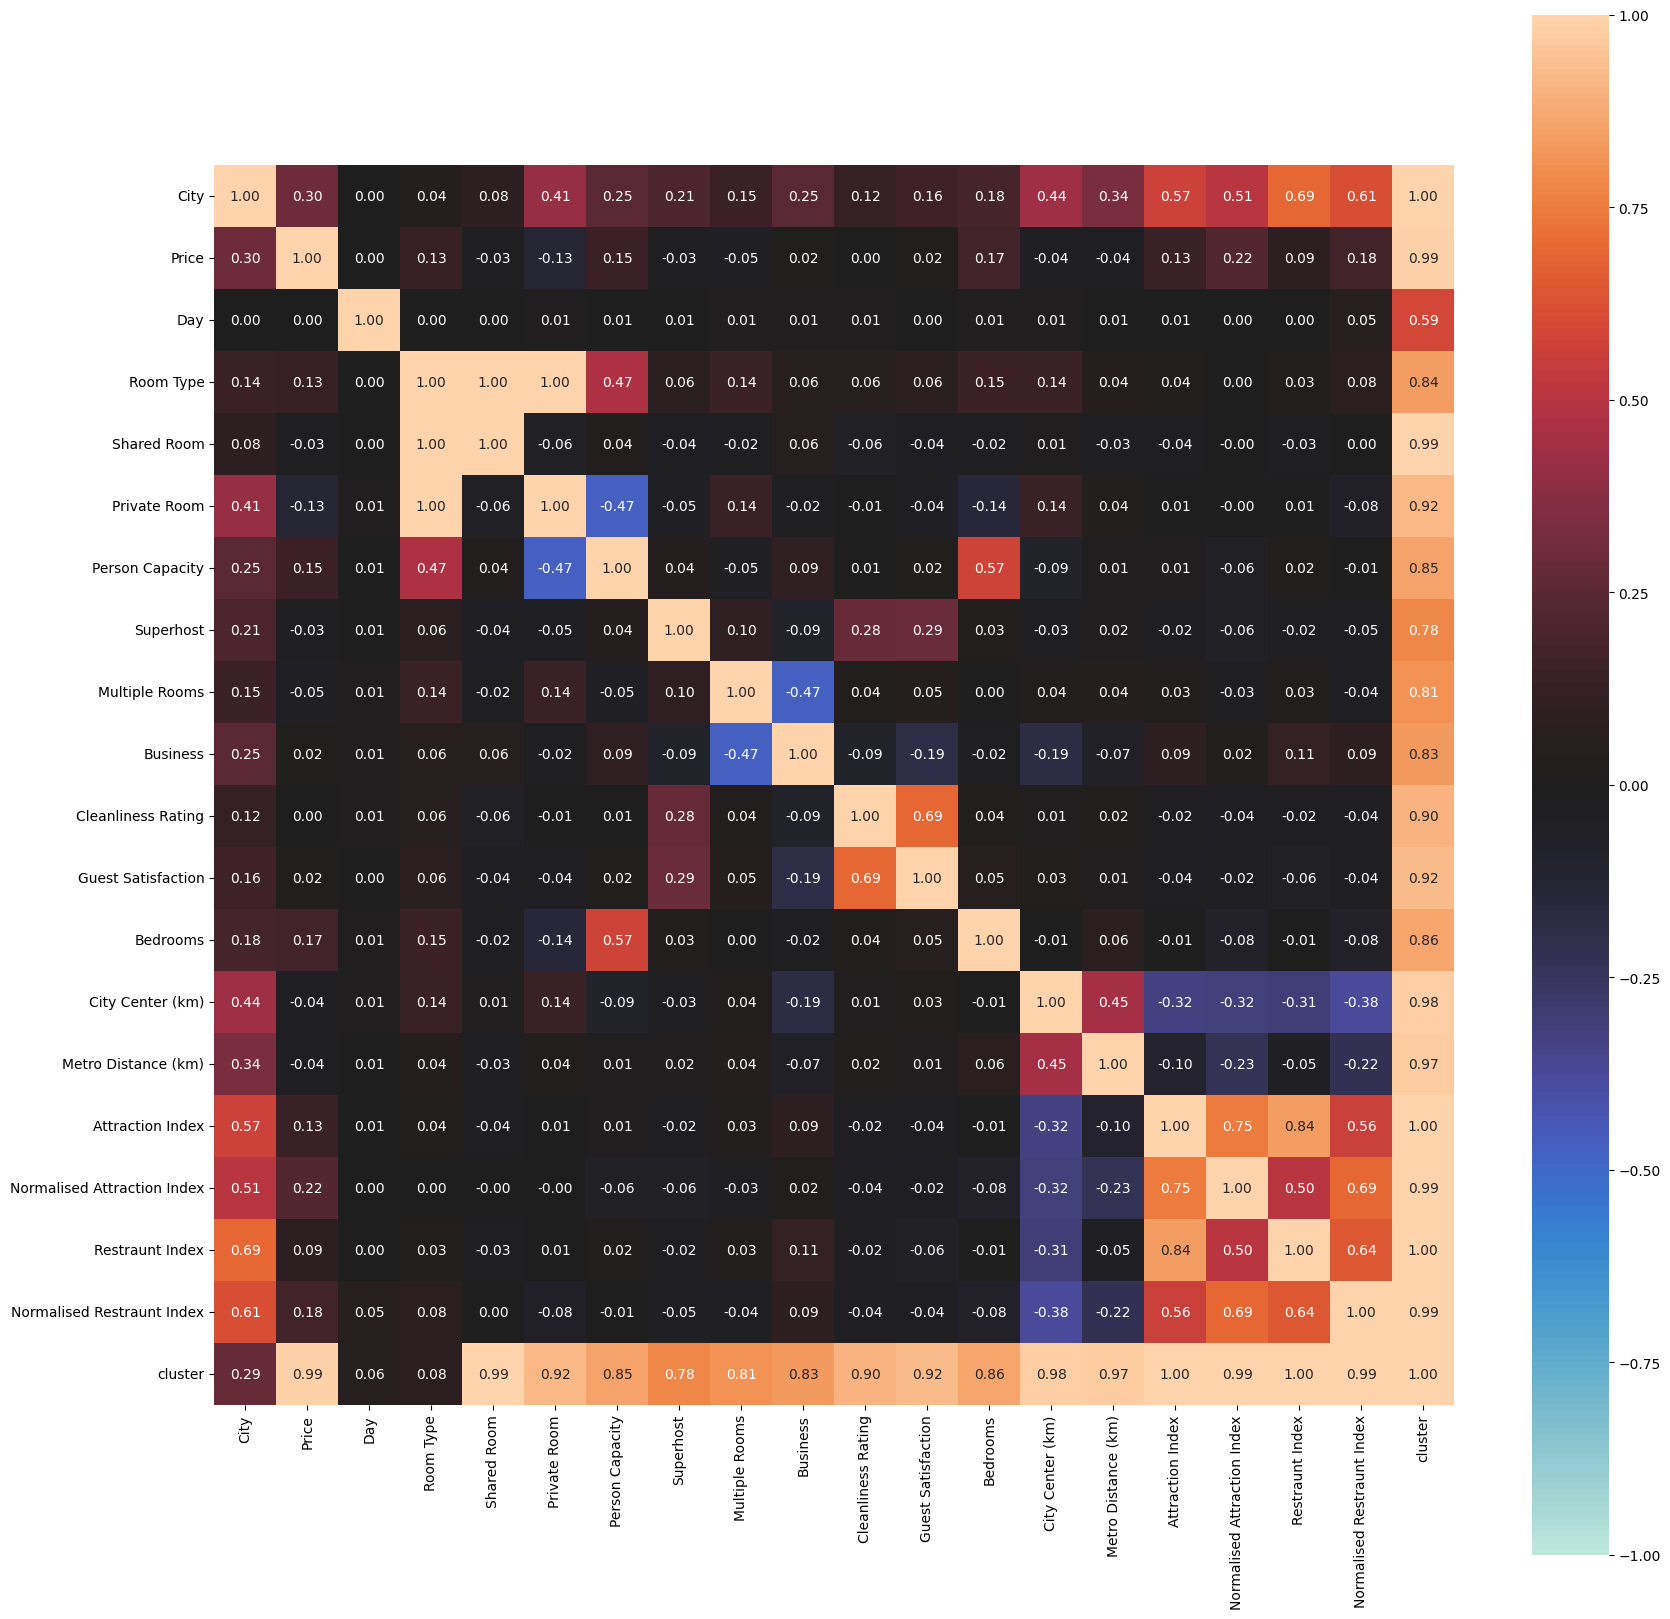

{'eps': 0.02, 'min_samples': 1} 0.5337396407483718 0.8605599416167804
{1: 5531, 2: 876, 3: 263, 4: 105, 5: 65, 6: 36, 7: 27, 8: 19, 9: 14, 10: 9, 11: 5, 12: 9, 13: 5, 14: 5, 15: 3, 16: 8, 17: 3, 18: 2, 19: 2, 20: 2, 22: 1, 23: 2, 24: 3, 26: 2, 29: 1, 30: 2, 32: 1, 34: 1, 38: 1, 43: 1, 61: 1, 71: 1, 75: 1, 89: 1, 95: 1, 104: 1, 107: 1, 115: 1, 125: 1, 129: 1, 173: 1, 257: 1, 361: 1, 468: 1, 824: 1, 1292: 1}


,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index,cluster
2674,Athens,181.848007,Weekday,Entire home/apt,False,False,6.0,True,0,0,10.0,98.0,2,1.727825,0.258118,117.294731,4.422499,209.458692,15.727433,0
5639,Athens,168.021934,Weekend,Entire home/apt,False,False,6.0,True,0,0,10.0,98.0,2,1.605879,0.432933,145.799207,5.493384,247.210005,3.691819,0
4225,Athens,97.251189,Weekday,Entire home/apt,False,False,3.0,False,0,0,9.0,95.0,1,0.915629,0.573858,173.593699,6.545204,203.625510,15.289443,0
4832,Athens,153.961521,Weekend,Entire home/apt,False,False,4.0,True,1,0,10.0,97.0,1,1.071147,0.299353,116.923619,4.405418,175.564743,2.621873,0
7017,Athens,115.998406,Weekend,Entire home/apt,False,False,4.0,True,0,0,10.0,99.0,1,4.570312,0.657399,37.327665,1.406422,56.167330,0.838800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,Barcelona,433.821305,Weekday,Entire home/apt,False,False,6.0,False,0,1,9.0,82.0,3,2.690027,0.801393,364.116193,12.409667,506.469543,11.148953,991
34985,Rome,220.232390,Weekend,Entire home/apt,False,False,4.0,False,1,0,10.0,96.0,2,3.559330,1.159631,303.872499,6.732430,742.539255,16.178129,992
29937,Rome,219.063428,Weekday,Entire home/apt,False,False,5.0,False,1,0,9.0,83.0,2,3.927907,1.869842,352.610003,7.813907,952.246913,20.733096,994
2574,Athens,147.165655,Weekday,Entire home/apt,False,False,4.0,False,0,1,9.0,93.0,1,1.250266,0.281584,197.846095,7.459620,386.076014,28.988937,995


In [13]:
airbnb = pd.read_csv('Aemf1.csv').sample(n=15000, random_state=0)

airbnb = optimize_clusters(airbnb, factor=0.01, lower_q=0.01, chunksize=20)

airbnb


customer shopping dataset

In [14]:
istanbul = pd.read_csv("customer_shopping_data.csv").sample(n=15000, random_state=0).iloc[:, 2:]
istanbul["price_per_unit"] = istanbul["price"] / istanbul["quantity"]
istanbul.drop("invoice_date", axis=1, inplace=True)

  0%|          | 0/4 [00:00<?, ?it/s]

[1. 1. 1. 1.] [7.14142843 2.         3.45758763 1.84030251]


/Users/temp/gower/gower/gower_dist.py:153: TqdmWarning: Iterable length 15000 > 1000 but `chunksize` is not set. This may seriously degrade multiprocess performance. Set `chunksize=1` or more.
  processed = process_map(f, range(x_n_rows), **tqdm_kwargs)


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

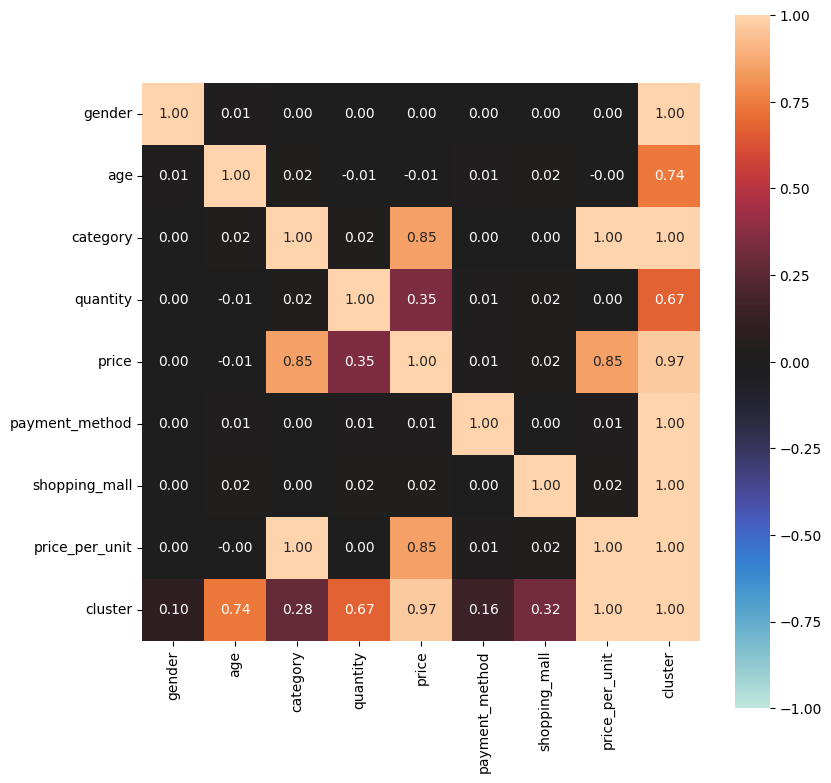

{'eps': 0.05, 'min_samples': 1} 0.7863995157345758 0.7560596958228702
{1: 1861, 2: 604, 3: 273, 4: 161, 5: 97, 6: 57, 7: 34, 8: 31, 9: 28, 10: 13, 11: 15, 12: 10, 13: 10, 14: 15, 15: 6, 16: 7, 17: 6, 18: 5, 19: 5, 20: 4, 21: 2, 22: 4, 23: 6, 24: 2, 25: 2, 26: 2, 27: 3, 28: 3, 29: 1, 30: 3, 31: 1, 32: 1, 33: 3, 34: 1, 35: 1, 36: 1, 38: 1, 39: 2, 40: 4, 41: 2, 42: 1, 43: 2, 45: 2, 47: 2, 50: 1, 51: 2, 53: 1, 55: 1, 56: 1, 57: 3, 60: 1, 62: 2, 64: 1, 66: 1, 68: 2, 70: 1, 71: 2, 74: 1, 84: 1, 85: 1, 87: 1, 89: 1, 90: 3, 91: 1, 94: 1, 95: 1, 98: 1, 100: 1, 101: 1, 104: 1, 111: 3, 124: 2, 126: 1, 133: 1, 136: 1, 137: 1, 138: 1, 141: 1, 147: 1, 152: 1, 154: 1, 157: 1, 195: 1, 205: 1, 217: 1, 223: 1, 274: 1, 303: 1}


,gender,age,category,quantity,price,payment_method,shopping_mall,price_per_unit,cluster
65992,Female,53,Clothing,3,900.24,Cash,Kanyon,300.08,40
1514,Female,34,Clothing,1,300.08,Cash,Kanyon,300.08,40
87290,Female,63,Clothing,1,300.08,Cash,Kanyon,300.08,40
23436,Female,33,Clothing,4,1200.32,Cash,Kanyon,300.08,40
46834,Female,22,Clothing,3,900.24,Cash,Kanyon,300.08,40
...,...,...,...,...,...,...,...,...,...
62585,Female,26,Books,4,60.60,Credit Card,Metropol AVM,15.15,991
14995,Male,24,Food & Beverage,4,20.92,Debit Card,Emaar Square Mall,5.23,992
97154,Female,31,Books,5,75.75,Debit Card,Mall of Istanbul,15.15,994
24446,Female,63,Technology,5,5250.00,Credit Card,Metropol AVM,1050.00,995


In [15]:
istanbul = optimize_clusters(istanbul)

istanbul


indian food dataset

  0%|          | 0/1 [00:00<?, ?it/s]

[1. 1. 1. 1. 1.] [6.25281013]


  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

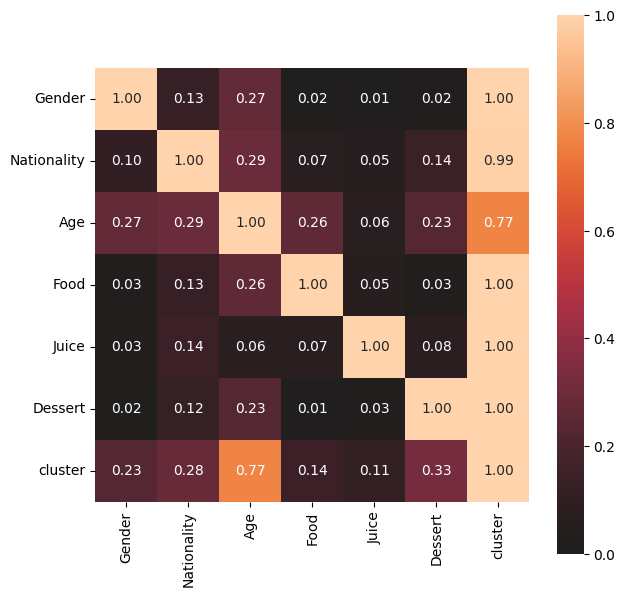

{'eps': 0.08, 'min_samples': 1} 0.7745470444815454 0.6878073658226892
{1: 46, 2: 7, 3: 3, 4: 4, 5: 2, 6: 2, 12: 1, 22: 1, 25: 1, 32: 1, 37: 1, 53: 1}


,,Gender,Nationality,Age,Food,Juice,Dessert,cluster
Timestamp,Participant_ID,,,,,,,
2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe,3
2019/05/07 3:18:07 PM GMT+8,FPS020,Female,Indian,31,Traditional food,Fresh Juice,Maybe,3
2019/05/07 3:49:18 PM GMT+8,FPS040,Female,Indian,34,Traditional food,Fresh Juice,Maybe,3
2019/05/07 4:03:45 PM GMT+8,FPS051,Female,Indian,22,Traditional food,Fresh Juice,Maybe,3
2019/05/07 4:09:53 PM GMT+8,FPS055,Female,Indian,25,Traditional food,Fresh Juice,Maybe,3
...,...,...,...,...,...,...,...,...
2019/05/07 3:07:36 PM GMT+8,FPS013,Female,Indonesia,22,Traditional food,Fresh Juice,Maybe,9
2019/05/07 3:09:06 PM GMT+8,FPS015,NaN,Muslim,27,Traditional food,Fresh Juice,Yes,-1
2019/05/08 1:03:16 PM GMT+8,FPS226,NaN,Indian,30,Traditional food,Fresh Juice,Yes,-1


In [16]:
indian_food = pd.read_csv('Food_Preference.csv').set_index(["Timestamp", "Participant_ID"], drop=True)

indian_food = optimize_clusters(indian_food)

indian_food
